In [1]:
#code of Interactive Quantum Classifier Inspired by Quantum Open System Theory
#LINK https://ieeexplore.ieee.org/document/9533917

#LINK https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9533917

#this code was written by Fernando Maciano de Paula Neto (fernando@cin.ufpe.br) together with Eduardo Barreto Brito (ebb2@cin.ufpe.br)

In [2]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from helpers.icq_methods import create_and_execute_classifier

In [3]:
VARY_INPUT = 1
VARY_WEIGHT = 2
VARY_BOTH = 3
DIFFERENT_VARIATIONS = [VARY_INPUT, VARY_WEIGHT, VARY_BOTH]

In [4]:
def generate_many_points(n_points, n_dimensional, scale=0.5, varied_part=1):
  list_of_x = []
  list_of_y = []
  list_of_z = []
  
  for i in range(n_points):
    # We need to study what happens when we variate different things
    if varied_part == VARY_INPUT:
      i_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
      w_n = scale*np.ones((n_dimensional,))
    elif varied_part == VARY_WEIGHT:
      i_n = scale*np.ones((n_dimensional,))
      w_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
    elif varied_part == VARY_BOTH:
      i_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
      w_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,))
    
    euclidean_distance = euclidean_distances([i_n], [w_n])
    z,p_cog = create_and_execute_classifier(i_n, w_n)
    list_of_x.append(euclidean_distance[0][0])
    list_of_y.append(p_cog.real)
    list_of_z.append(z)

  return list_of_x, list_of_y, list_of_z

Variation: 1


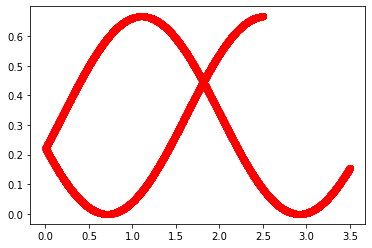

----------------------------------------------
Variation: 2


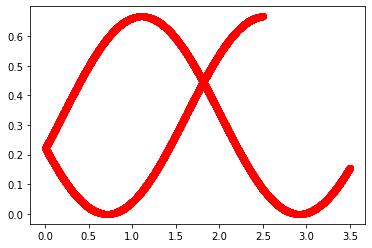

----------------------------------------------
Variation: 3


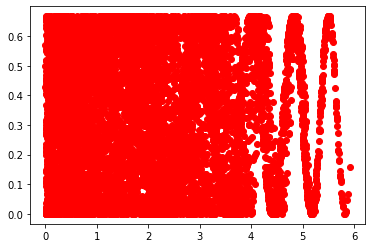

----------------------------------------------


In [5]:
# First let's see only what happens when we change what we're trying to vary
for variation in DIFFERENT_VARIATIONS:
    print("Variation:", variation)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, varied_part=variation)
    plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
    plt.show()
    print("----------------------------------------------")

Variation: 1


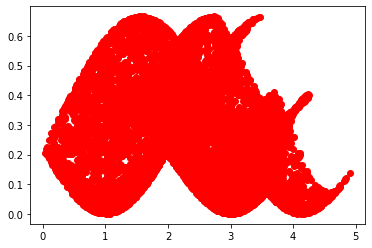

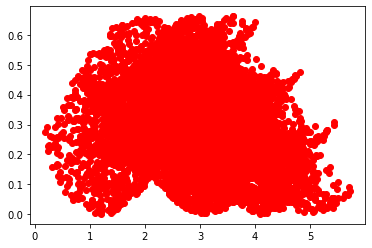

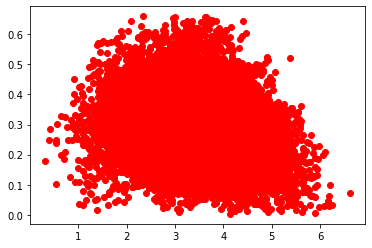

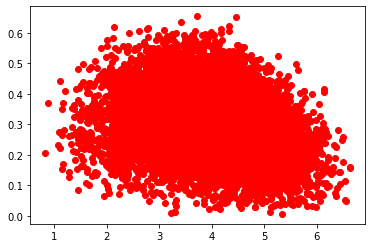

----------------------------------------------
Variation: 2


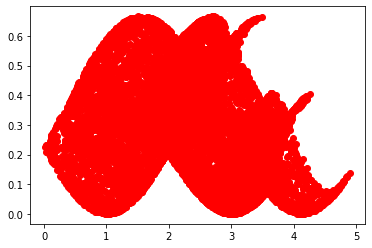

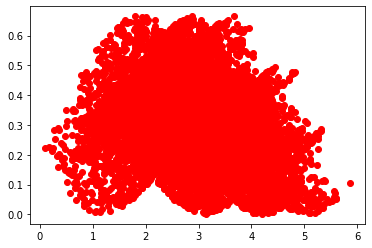

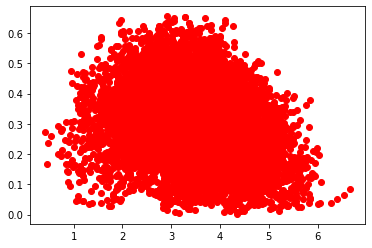

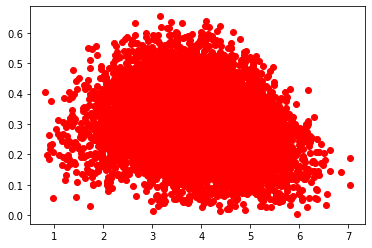

----------------------------------------------
Variation: 3


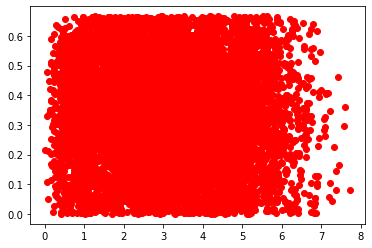

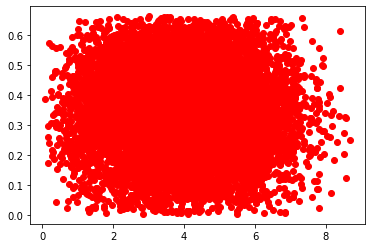

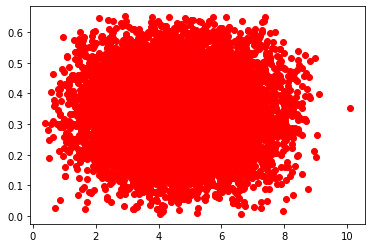

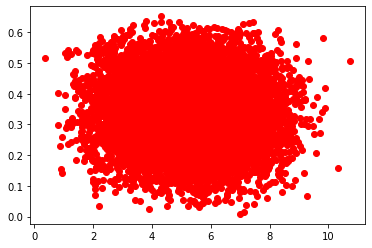

----------------------------------------------


In [6]:
# Then we see what happens with different number of dimensions
for variation in DIFFERENT_VARIATIONS:
    print("Variation:", variation)
    for n in range(2, 6):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, n, varied_part=variation)
        plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
        plt.show()
    print("----------------------------------------------")

Variation: 1


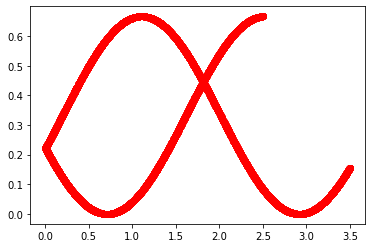

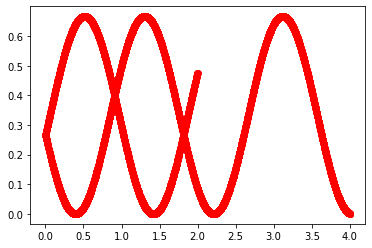

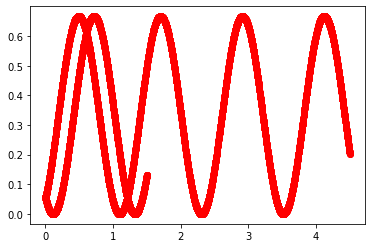

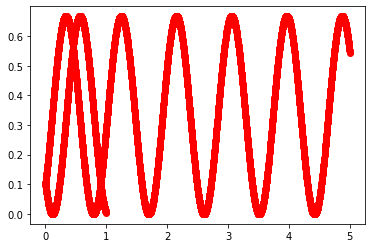

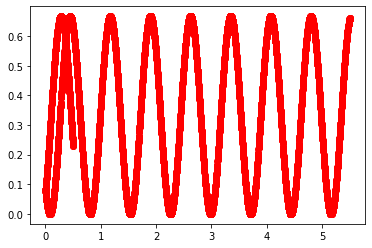

----------------------------------------------
Variation: 2


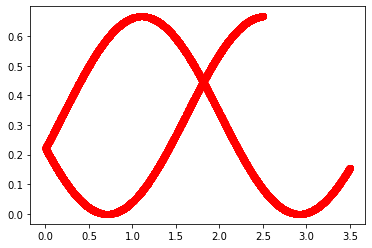

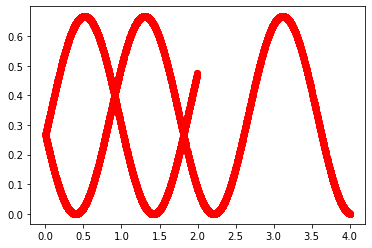

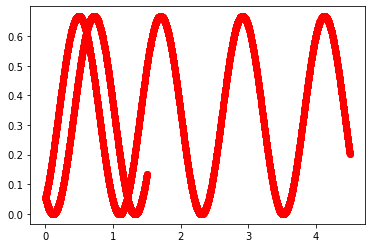

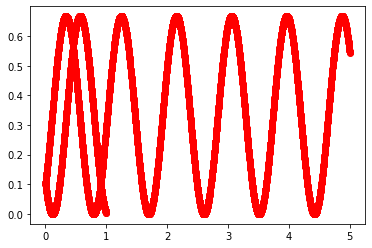

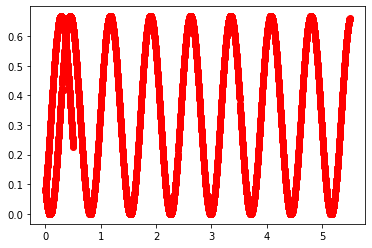

----------------------------------------------


In [7]:
# Last thing we want to know is how the scale affects the points
for variation in [VARY_INPUT, VARY_WEIGHT]:
    print("Variation:", variation)
    for n in np.arange(0.5, 3, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, scale=n, varied_part=variation)
        plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
        plt.show()
    print("----------------------------------------------")